In [17]:
# import packages
import json, re, nltk, spacy, gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import gensim.corpora as corpora
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.stem.wordnet import WordNetLemmatizer

In [18]:
df = pd.read_csv('yelp.csv')

In [19]:
# identify stopwords
stopwords = stopwords.words('english')
# add more to stop words
extra_stopwords = ['nt', 'good', 'bad', 'tell', 'say', 'ask', 'use', 'come', 'make', 
                   'company', 'stay', 'want', 'know', 'like', 'anymore', 'lot', 'great', 
                   'ok', 'nice', 'dish', 'really', 'look', 'better', 'guy', 'dr', 'try']
stopwords.extend(extra_stopwords)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

# form bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# form trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def text_process(data, star_level):
    # convert to list
    text = data[data['stars']==star_level]['text'].tolist()
    
    text = [w.replace("'s", " ").replace("n’t", " not").replace("’ve", " have") for w in text]
    text = [re.sub(r'[^a-zA-Z0-9 ]', '', w) for w in text]
    return text

def compute_coherence_values(dictionary, corpus, texts, start, max_topics):

    coherence_values = []
    k = []
    for num_topics in range(start, max_topics+1):
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               random_state=100)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        k.append(num_topics)
        coherence_values.append(coherence_model_lda.get_coherence())
    return coherence_values

# level 1

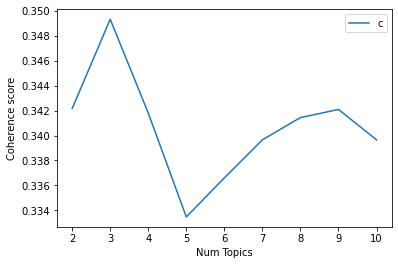

Num Topics = 2  has Coherence Value of 0.3422
Num Topics = 3  has Coherence Value of 0.3493
Num Topics = 4  has Coherence Value of 0.3418
Num Topics = 5  has Coherence Value of 0.3335
Num Topics = 6  has Coherence Value of 0.3366
Num Topics = 7  has Coherence Value of 0.3397
Num Topics = 8  has Coherence Value of 0.3414
Num Topics = 9  has Coherence Value of 0.3421
Num Topics = 10  has Coherence Value of 0.3397


In [22]:
data = text_process(df, 1)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# construct bigrams
data_words_bigrams = make_bigrams(data_words)
# initialize model
nlp = spacy.load('en', disable=['parser', 'ner'])
# word lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# create Corpus
texts = data_lemmatized
# tdf
corpus = [id2word.doc2bow(text) for text in texts]

# find coherence score for optimizing lda performance
coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, max_topics=10)

# visualization
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# level 2

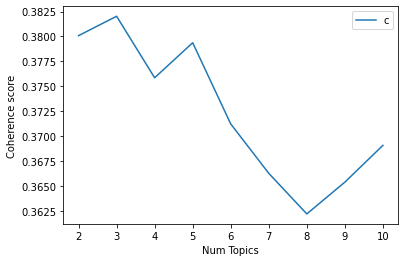

Num Topics = 2  has Coherence Value of 0.3801
Num Topics = 3  has Coherence Value of 0.382
Num Topics = 4  has Coherence Value of 0.3759
Num Topics = 5  has Coherence Value of 0.3794
Num Topics = 6  has Coherence Value of 0.3712
Num Topics = 7  has Coherence Value of 0.3663
Num Topics = 8  has Coherence Value of 0.3622
Num Topics = 9  has Coherence Value of 0.3654
Num Topics = 10  has Coherence Value of 0.3691


In [23]:
data = text_process(df, 2)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# construct bigrams
data_words_bigrams = make_bigrams(data_words)
# initialize model
nlp = spacy.load('en', disable=['parser', 'ner'])
# word lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# create Corpus
texts = data_lemmatized
# tdf
corpus = [id2word.doc2bow(text) for text in texts]

# find coherence score for optimizing lda performance
coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, max_topics=10)

# visualization
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# level 3

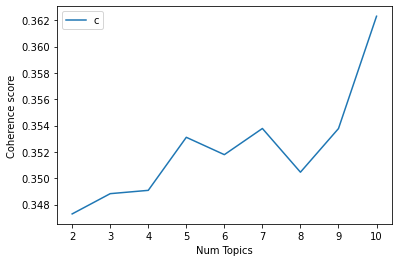

Num Topics = 2  has Coherence Value of 0.3473
Num Topics = 3  has Coherence Value of 0.3488
Num Topics = 4  has Coherence Value of 0.3491
Num Topics = 5  has Coherence Value of 0.3531
Num Topics = 6  has Coherence Value of 0.3518
Num Topics = 7  has Coherence Value of 0.3538
Num Topics = 8  has Coherence Value of 0.3505
Num Topics = 9  has Coherence Value of 0.3538
Num Topics = 10  has Coherence Value of 0.3623


In [24]:
data = text_process(df, 3)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# construct bigrams
data_words_bigrams = make_bigrams(data_words)
# initialize model
nlp = spacy.load('en', disable=['parser', 'ner'])
# word lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# create Corpus
texts = data_lemmatized
# tdf
corpus = [id2word.doc2bow(text) for text in texts]

# find coherence score for optimizing lda performance
coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, max_topics=10)

# visualization
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# level 4

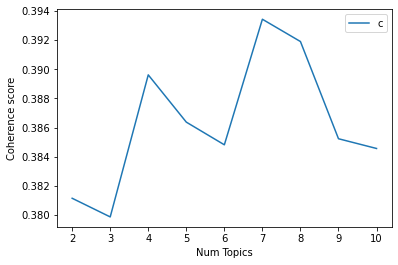

Num Topics = 2  has Coherence Value of 0.3811
Num Topics = 3  has Coherence Value of 0.3799
Num Topics = 4  has Coherence Value of 0.3896
Num Topics = 5  has Coherence Value of 0.3864
Num Topics = 6  has Coherence Value of 0.3848
Num Topics = 7  has Coherence Value of 0.3934
Num Topics = 8  has Coherence Value of 0.3919
Num Topics = 9  has Coherence Value of 0.3852
Num Topics = 10  has Coherence Value of 0.3846


In [25]:
data = text_process(df, 4)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# construct bigrams
data_words_bigrams = make_bigrams(data_words)
# initialize model
nlp = spacy.load('en', disable=['parser', 'ner'])
# word lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# create Corpus
texts = data_lemmatized
# tdf
corpus = [id2word.doc2bow(text) for text in texts]

# find coherence score for optimizing lda performance
coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, max_topics=10)

# visualization
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# level 5

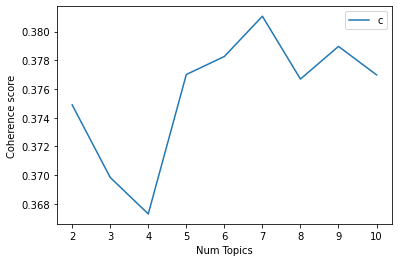

Num Topics = 2  has Coherence Value of 0.3749
Num Topics = 3  has Coherence Value of 0.3698
Num Topics = 4  has Coherence Value of 0.3673
Num Topics = 5  has Coherence Value of 0.377
Num Topics = 6  has Coherence Value of 0.3783
Num Topics = 7  has Coherence Value of 0.3811
Num Topics = 8  has Coherence Value of 0.3767
Num Topics = 9  has Coherence Value of 0.379
Num Topics = 10  has Coherence Value of 0.377


In [26]:
data = text_process(df, 5)
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# construct bigrams
data_words_bigrams = make_bigrams(data_words)
# initialize model
nlp = spacy.load('en', disable=['parser', 'ner'])
# word lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# create Corpus
texts = data_lemmatized
# tdf
corpus = [id2word.doc2bow(text) for text in texts]

# find coherence score for optimizing lda performance
coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, max_topics=10)

# visualization
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))